In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
honey = pd.read_csv('../../ArewaDS-Machine-Learning-Assignments/week3/honey.csv')
honey.tail()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
621,VA,4000.0,41,164000.0,23000.0,3.77,618000.0,2012
622,WA,62000.0,41,2542000.0,1017000.0,2.38,6050000.0,2012
623,WV,6000.0,48,288000.0,95000.0,2.91,838000.0,2012
624,WI,60000.0,69,4140000.0,1863000.0,2.05,8487000.0,2012
625,WY,50000.0,51,2550000.0,459000.0,1.87,4769000.0,2012


Let's drop some some not needed columns

In [4]:
new_Honey = ['state', 'numcol', 'yieldpercol', 'totalprod', 'priceperlb', 'prodvalue', 'year']
honey = honey.drop([c for c in honey.columns if c not in new_Honey], axis=1)
honey

,state,numcol,yieldpercol,totalprod,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,0.70,1361000.0,1998
...,...,...,...,...,...,...,...
621,VA,4000.0,41,164000.0,3.77,618000.0,2012
622,WA,62000.0,41,2542000.0,2.38,6050000.0,2012
623,WV,6000.0,48,288000.0,2.91,838000.0,2012
624,WI,60000.0,69,4140000.0,2.05,8487000.0,2012


Let exlore the data to determine the suitabilty of developing regression model

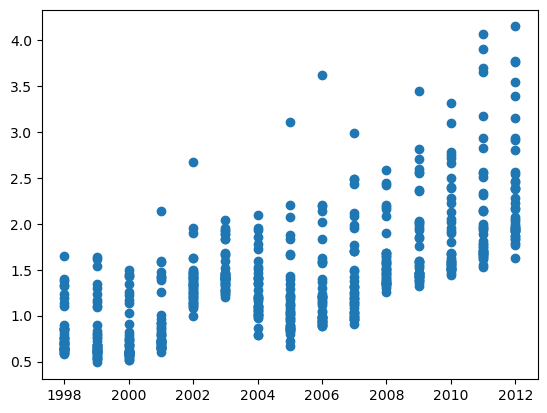

In [5]:
plt.scatter('year','priceperlb',data=honey)

<Axes: ylabel='Density'>

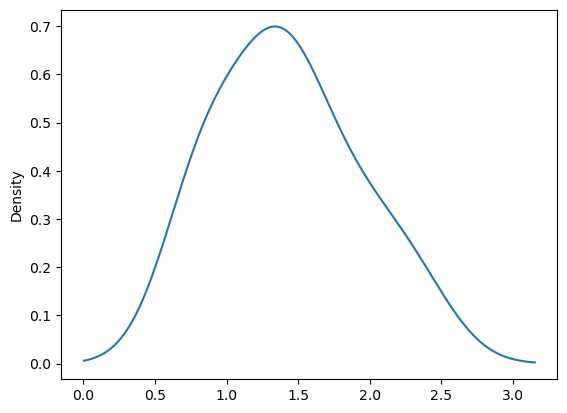

In [7]:
honey.groupby('year')['priceperlb'].mean().plot(kind='density')

Mean error: 0.451 (32.6%)
Model determination:  0.4837532460042242


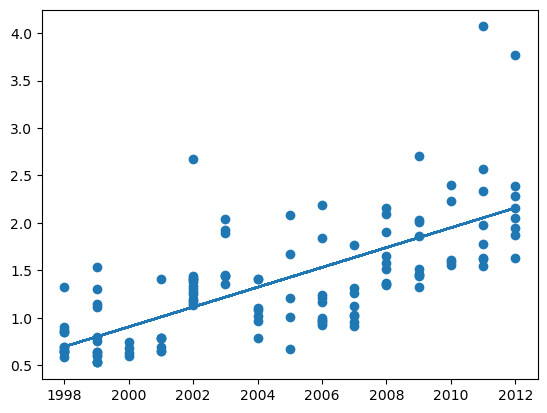

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X = honey['year'].to_numpy().reshape(-1,1)
y = honey['priceperlb']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regr = LinearRegression()
regr.fit(X_train,y_train)

pred = regr.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = regr.score(X_train,y_train)
print('Model determination: ', score)

plt.scatter(X_test,y_test)
plt.plot(X_test,pred)

Mean error: 0.446 (32.1%)
Model determination:  0.4966508043127429


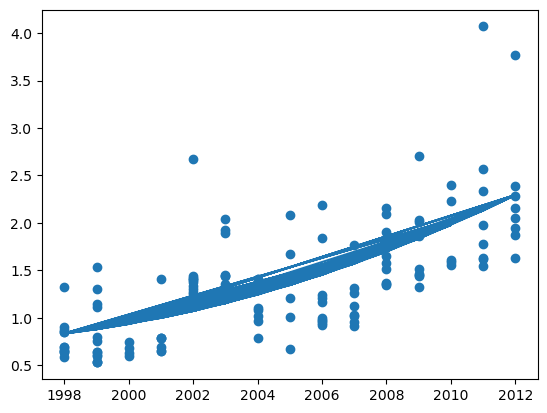

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

#To include all second-degree polynomials from the input data.
pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

pipeline.fit(X_train, y_train)

pred = pipeline.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test, pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = pipeline.score(X_train,y_train)
print('Model determination: ', score)

plt.scatter(X_test,y_test)
plt.plot(X_test, pred)